<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

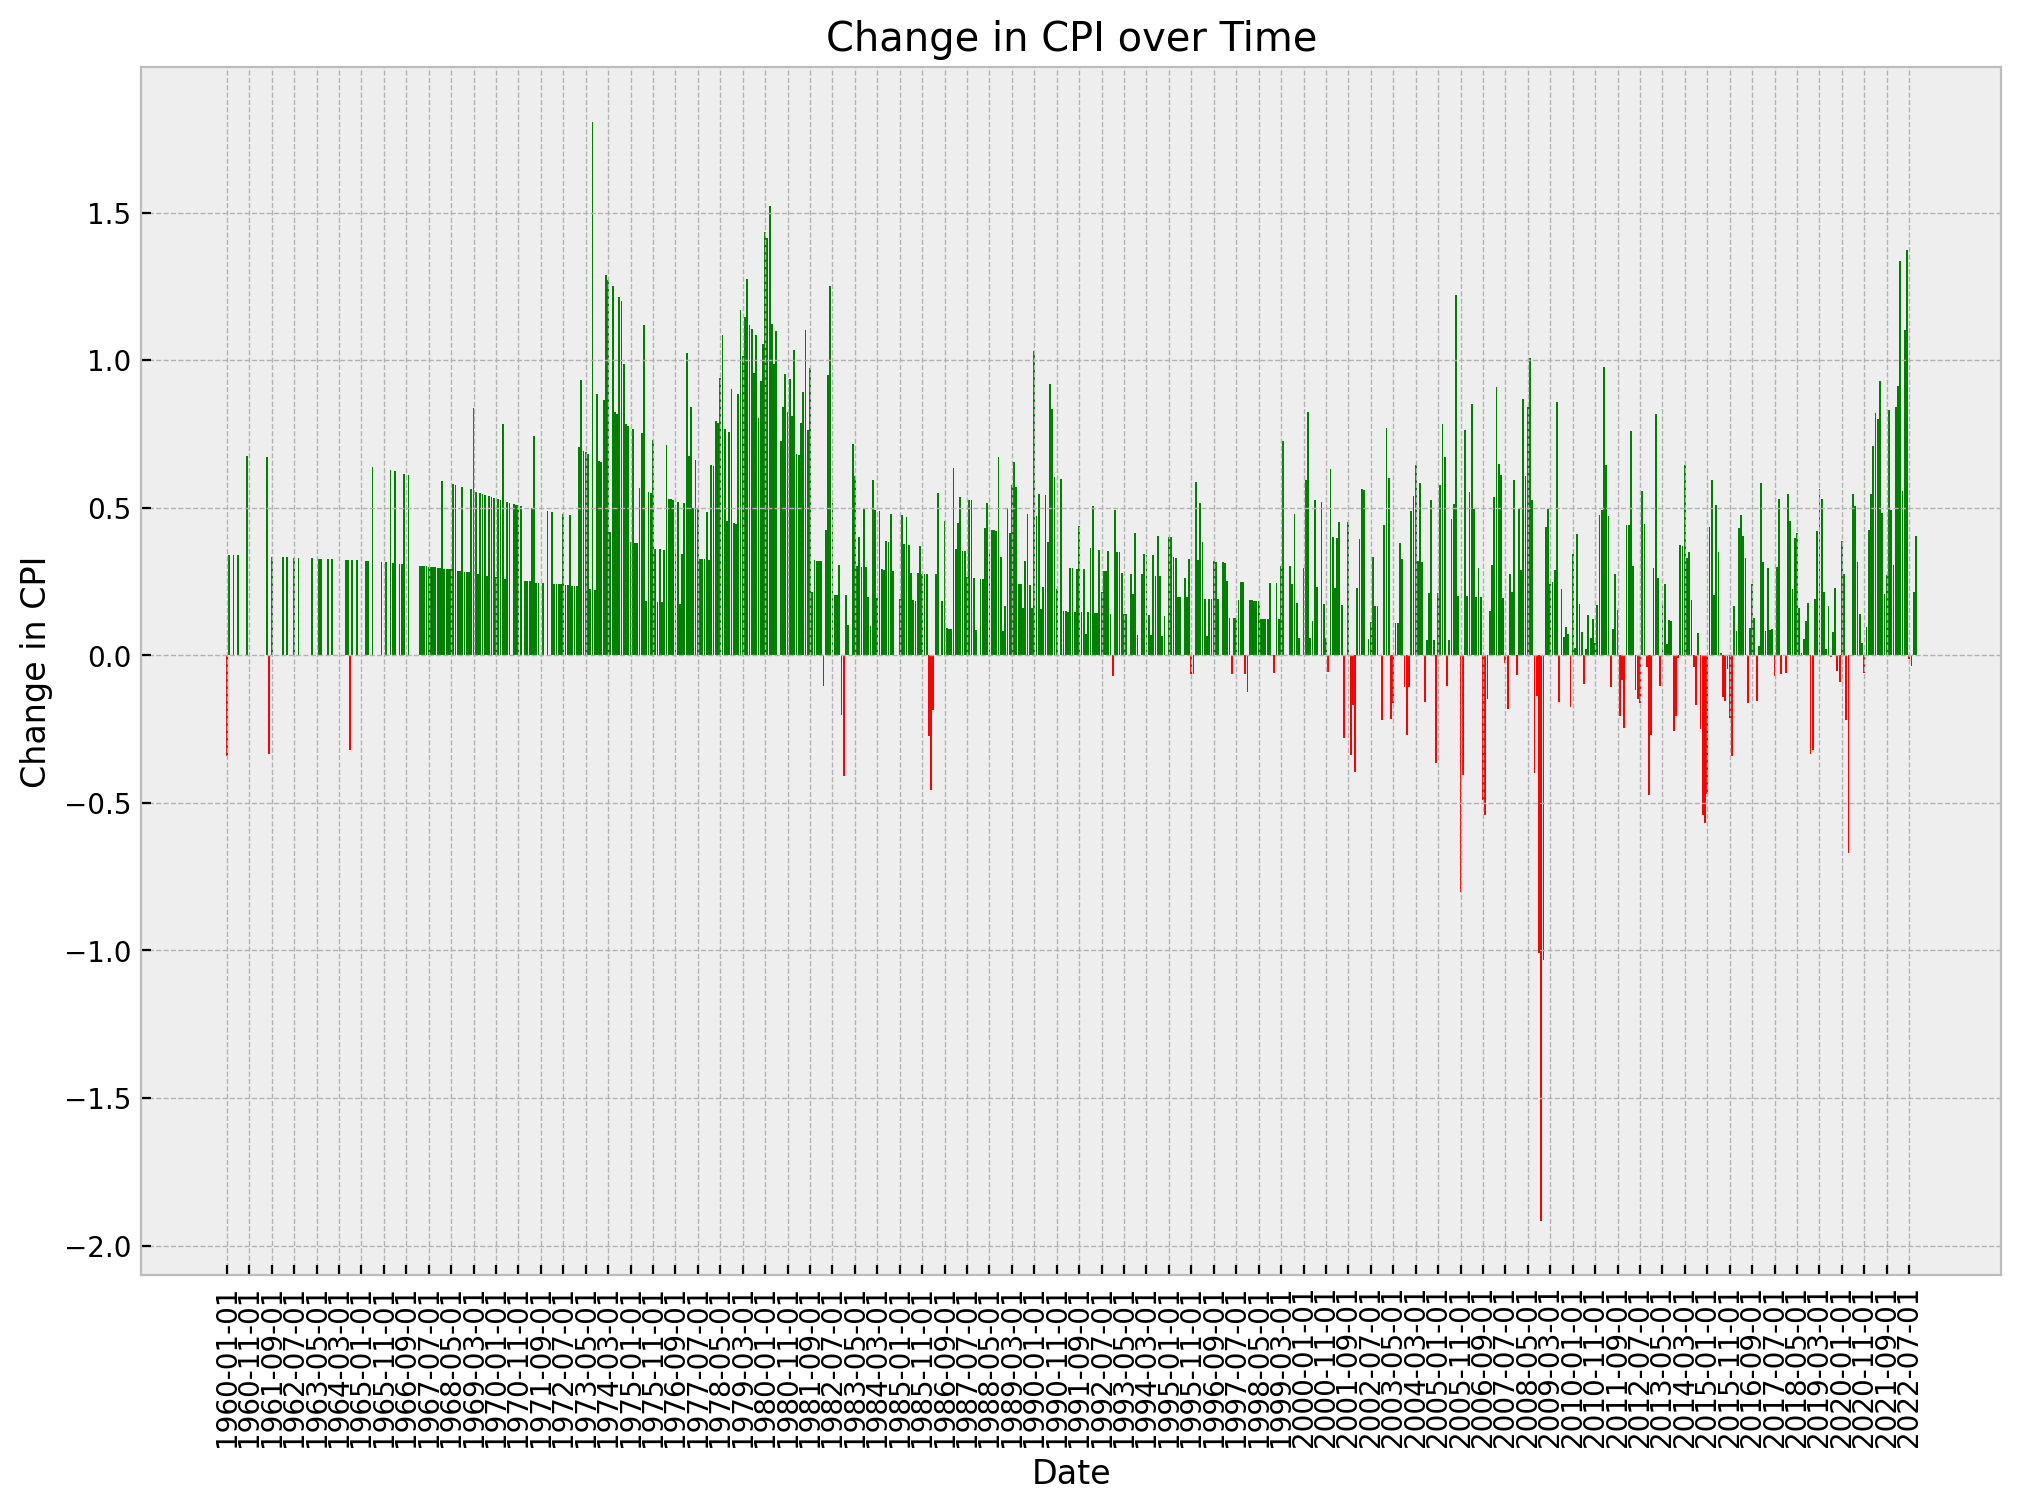

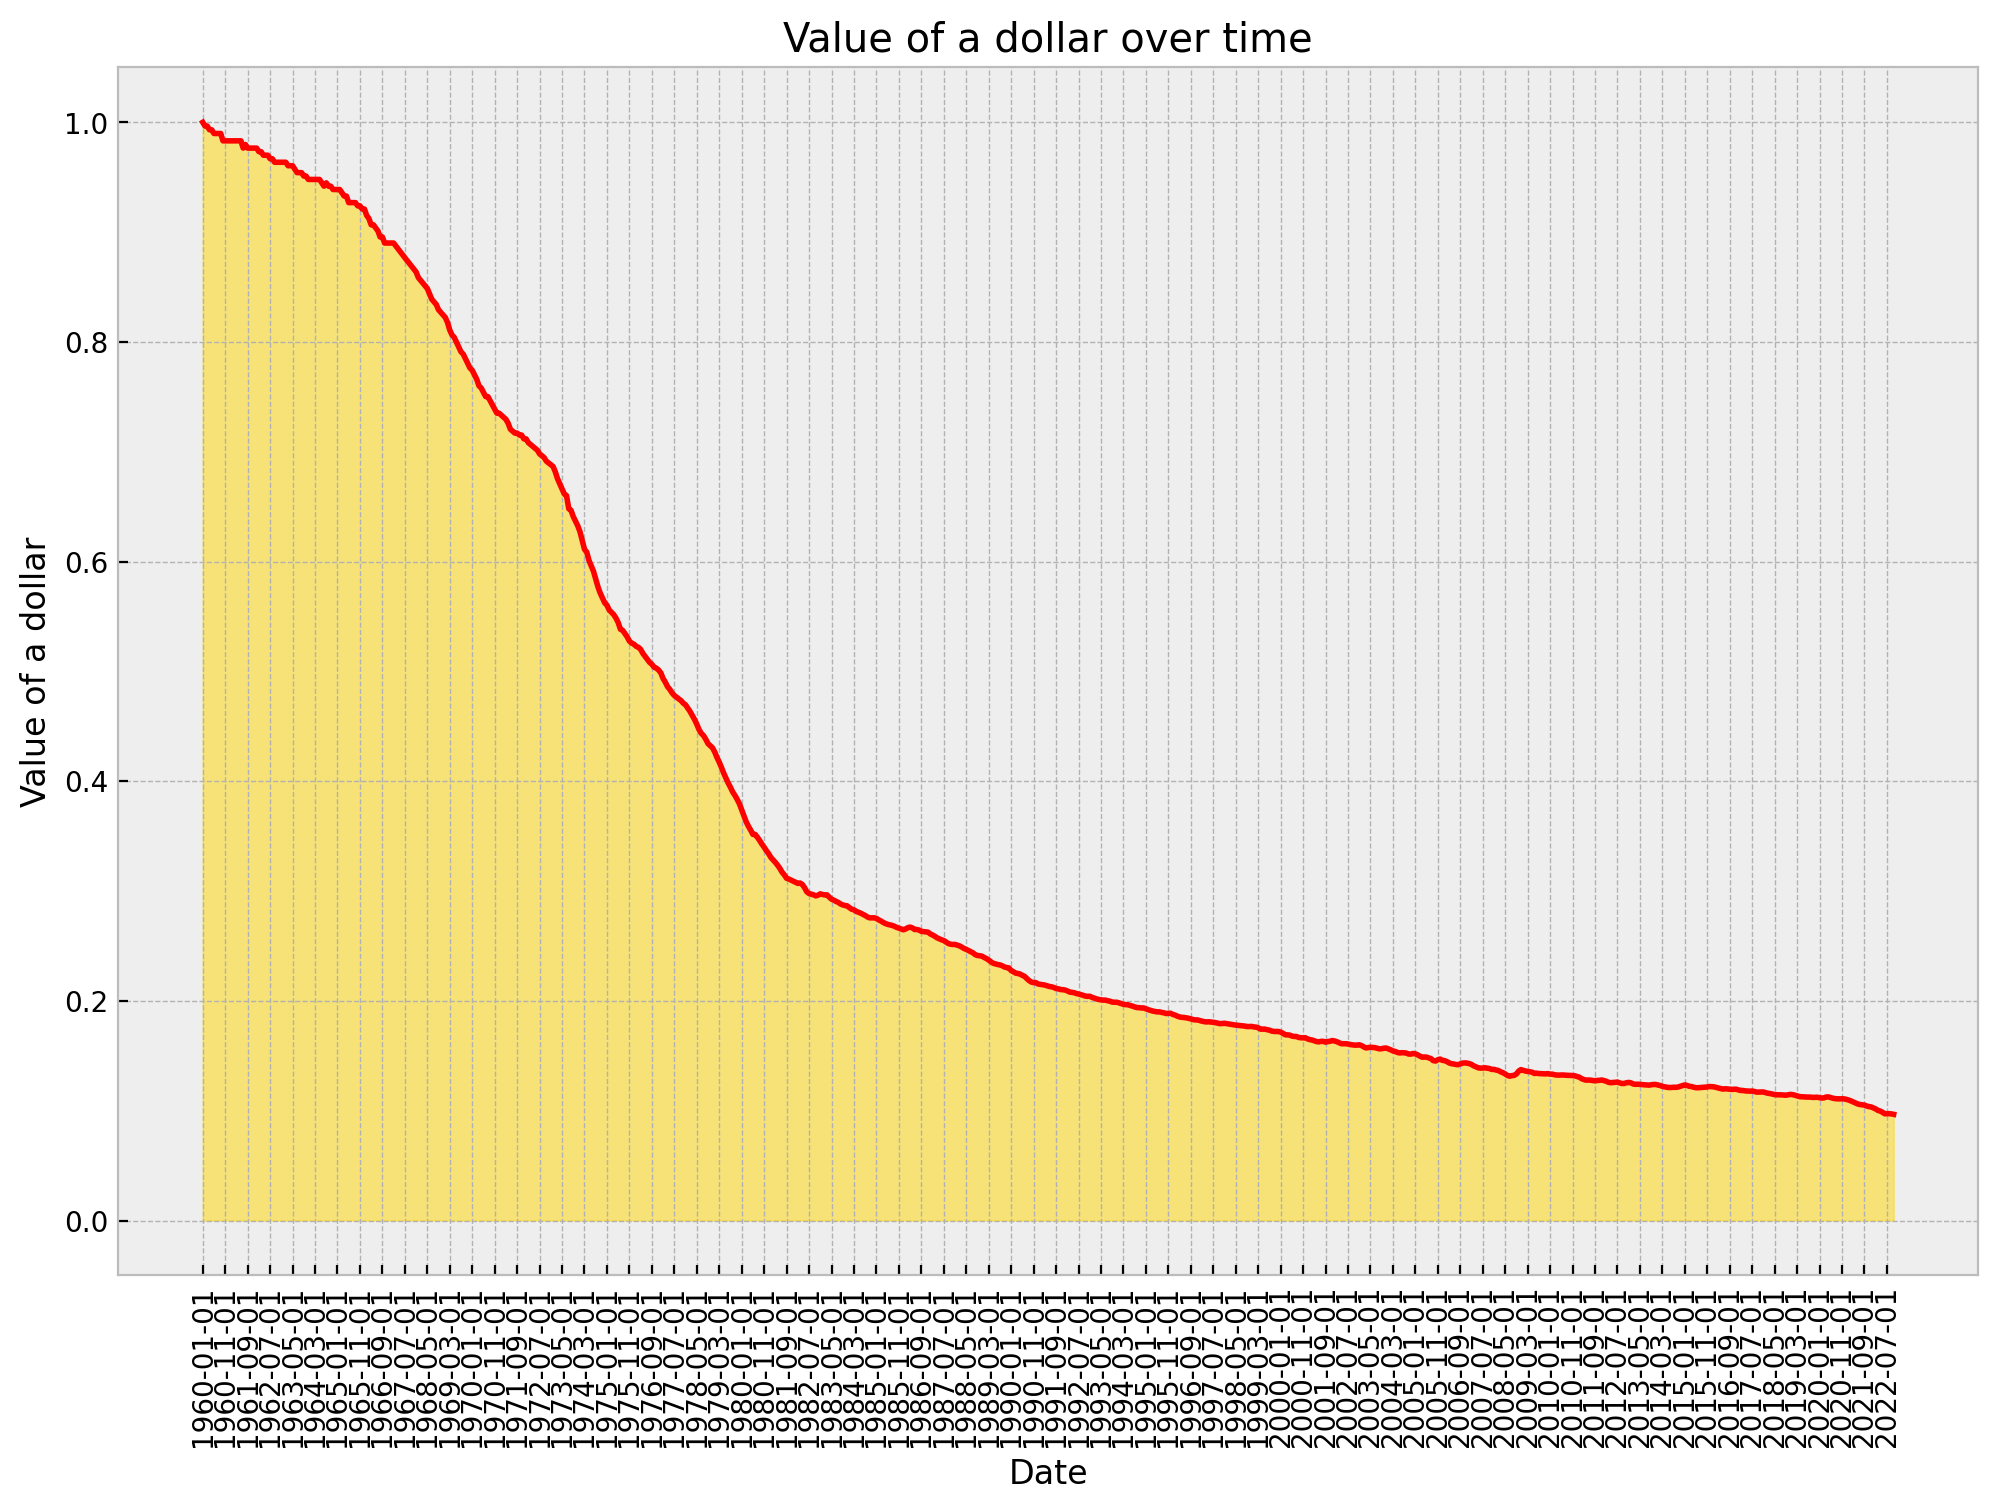

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPALTT01USM657N&scale=left&cosd=1960-01-01&coed=2022-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-01-11&revision_date=2023-01-11&nd=1960-01-01'

data = pd.read_csv(url)

# Set colors for positive and negative values
data['color'] = ['green' if x > 0 else 'red' for x in data['CPALTT01USM657N']]

# Plot the data with colors
plt.bar(data['DATE'], data['CPALTT01USM657N'], color=data['color'])
plt.xticks(data['DATE'][::10], rotation=90)
plt.xlabel('Date')
plt.ylabel('Change in CPI')
plt.title('Change in CPI over Time')
plt.show()

# Calculate the value of a dollar over time
base_value = 1    # Set the base value of the dollar
data['Dollar_Value'] = base_value

for i in range(1, len(data)):
  data.loc[i, 'Dollar_Value'] = (1 - (data.loc[i, 'CPALTT01USM657N'] / 100)) * data.loc[i-1, 'Dollar_Value']

# Plot the performance of the dollar over the years
plt.plot(data['DATE'], data['Dollar_Value'], color='r')
plt.xticks(data['DATE'][::10], rotation=90)
plt.xlabel('Date')
plt.ylabel('Value of a dollar')
plt.title('Value of a dollar over time')
plt.fill_between(data['DATE'], data['Dollar_Value'], alpha=.5, color='gold')
plt.show()